In [1]:
import os
import sys
sys.path.insert(0, os.path.relpath('../../../../..')) 

In [2]:
from recidiviz.calculator.modeling.population_projection.simulations.super_simulation_factory import SuperSimulationFactory
from recidiviz.calculator.modeling.population_projection.compartment_transitions import CompartmentTransitions
from recidiviz.calculator.modeling.population_projection.release_transitions import ReleasedTransitions
from recidiviz.calculator.modeling.population_projection.spark_policy import SparkPolicy
import pandas as pd
from functools import partial
import yaml

/Users/pacopoler/.local/share/virtualenvs/pulse-data-Jd9N3JcA/lib/python3.7/site-packages/google/cloud/bigquery/table.py:1728: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  create_bqstorage_client=create_bqstorage_client,


outflows_data returned 18 results
transitions_data returned 7 results
total_population_data returned 0 results
initialization time:  10.260149955749512
simulation_time:  0.554542064666748
initialization time:  9.929128885269165
simulation_time:  0.5888991355895996
initialization time:  9.904513120651245
simulation_time:  0.5466020107269287


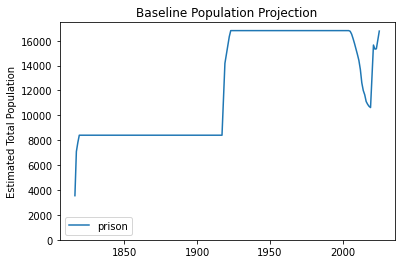

In [3]:
test_sim = SuperSimulationFactory.build_super_simulation('../state/NJ/NJ_prison_model_inputs.yaml')
test_sim.simulate_baseline(['prison'])

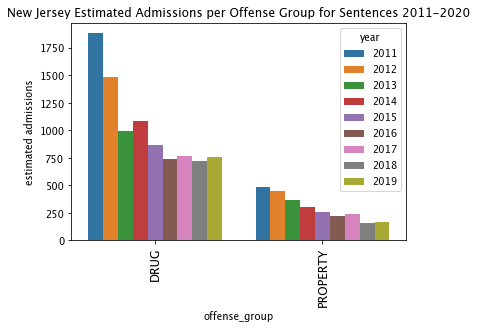

In [2]:
# # Offense Group Options
# offense_group_chart = sns.barplot(data=historical_admissions, x='offense_group', y='total_population', hue='year')
# offense_group_chart.set_title('New Jersey Estimated Admissions per Offense Group for Sentences 2011-2020')
# offense_group_chart.set_ylabel('estimated admissions')
# chart_axis_label = offense_group_chart.set_xticklabels(offense_group_chart.get_xticklabels(), rotation=90, 
#                                                        fontsize='large')

Text(0, 0.5, 'estimated sentences')

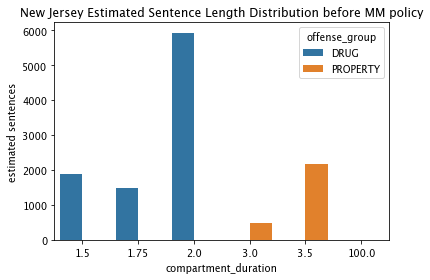

In [3]:
# sentence_length_chart = sns.barplot(data=historical_sentences, x='compartment_duration', y='total_population', 
#                                     hue='offense_group')
# sentence_length_chart.set_title('New Jersey Estimated Sentence Length Distribution before MM policy')
# sentence_length_chart.set_ylabel('estimated sentences')

../../spark/super_simulation.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outflows_data['time_step'] = outflows_data['time_step'].apply(int)
../../spark/super_simulation.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_population_data['time_step'] = total_population_data['time_step'].apply(int)


initialization time:  0.007088184356689453
simulation_time:  30.620903968811035
initialization time:  0.003924846649169922
simulation_time:  32.41834616661072


,compartment,year,policy_total_population,control_total_population
0,prison,2016.0,6404.455146,6404.455146
1,prison,2017.0,9633.103200,9633.103200
2,prison,2018.0,10168.165099,10168.165099
3,prison,2019.0,10626.584621,10626.584621
4,prison,2020.0,13232.495242,13232.495242
5,prison,2021.0,15648.801348,15648.801348
6,prison,2022.0,15320.881751,15320.881751
7,prison,2023.0,15347.201166,15347.201166
8,prison,2024.0,16050.275160,16050.275160
9,prison,2025.0,16768.939376,16768.939376


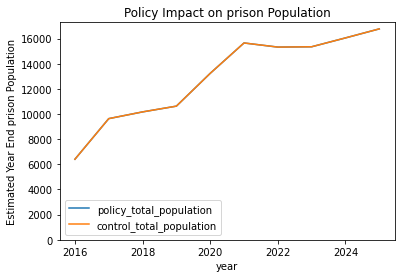

In [2]:
test = open('../state/NJ/NJ_prison_model_inputs.yaml')
test_sim = SuperSimulation(test)
test_sim.simulate_policy([], 'prison')

In [4]:
test = open('../state/NJ/NJ_prison_model_inputs.yaml')
test_sim = SuperSimulation(test)
test_sim.simulate_baseline('pretrial', 'prison')

initialization time:  0.006926059722900391
simulation_time:  27.340559005737305


(           DRUG  PROPERTY
 time_step                
 2011.0        0         0
 2012.0        0         0
 2013.0        0         0
 2014.0        0         0
 2015.0        0         0
 2016.0        0         0
 2017.0        0         0
 2018.0        0         0
 2019.0        0         0,
             DRUG  PROPERTY
 prison  0.264787  0.314083)

In [ ]:
no_policy_df = pd.DataFrame(columns=['sub_population', 'compartment', 'retroactive_policies', 'non_retroactive_policies'])
user_inputs = {'projection_years': 10, 'policy_year': 2020, 'policy_df': no_policy_df, 'start_year': 2016}
disaggregation_axes = ['offense_group']
no_policy_projection = population_simulation.PopulationSimulation()
no_policy_results = no_policy_projection.simulate_sentencing_policies(historical_admissions, historical_sentences, 
                                                                      disaggregation_axes, user_inputs)
no_policy_results.head()

In [ ]:
for offense, group in no_policy_results.groupby('simulation_group'):
    print(offense, historical_offender_counts[f'{offense.lower()}_median_sentence_length'].values)
    ax = group[(group['compartment'] == 'prison') & (group['year'] > 2000)].plot(x='year', y='total_population', label='modeled')
    historical_offender_counts.plot(x='year', y=f'{offense.lower()}_sentences', label='actual', ax=ax)
    joined_results = historical_offender_counts[['year', f'{offense.lower()}_sentences']].merge(
        group[group['compartment'] == 'prison'], on='year')
    mae = np.mean(np.abs(joined_results[f'{offense.lower()}_sentences'] - joined_results['total_population']))
    
    plt.title(f'{offense} Total Prison Population per Year - MAE {mae:.2f}')
    plt.ylabel('start of year population')
    plt.ylim([0, None])

In [ ]:
for offense, group in policy_results.groupby('simulation_group'):
    ax = None
    #policy_plot_set = group[(group['compartment'] == 'prison') & (group['year'] > 2000)]
    #ax = policy_plot_set.plot(x='year', y='total_population', label='mm_policy_enacted')
    
    no_policy_plot_set = no_policy_results[(no_policy_results['compartment'] == 'prison') 
                                           & (no_policy_results['year'] > 2009) 
                                           & (no_policy_results['year'] < 2022) 
                                           & (no_policy_results['simulation_group'] == offense)]
    ax = no_policy_plot_set.plot(x='year', y='total_population', label='modeled_baseline', ax=ax)

    historical_offender_counts.plot(x='year', y=f'{offense.lower()}_sentences', label='actual', ax=ax)
    
    
    plt.title(f'New Jersey Total Prison Population per Year - {offense} Offenders')
    plt.ylabel('start of year population')
    plt.ylim([0, None])

In [ ]:
pct_early_parole_eligible = 0.33
early_parole_updated_sentences = pd.DataFrame()
updated_sentences_list = []
for index, row in historical_sentences.iterrows(): 
    parole_eligible_population = np.round(pct_early_parole_eligible * row['total_population'], 0)
    
    parole_eligible_row = row.to_dict()
    parole_eligible_row['compartment_duration'] *= 0.5
    parole_eligible_row['total_population'] = parole_eligible_population
    
    
    parole_ineligible_row = row.to_dict()
    parole_ineligible_row['total_population'] = row['total_population'] - parole_eligible_population
    
    updated_sentences_list.extend([parole_ineligible_row, parole_eligible_row])
    
early_parole_updated_sentences = pd.DataFrame(updated_sentences_list)
early_parole_updated_sentences = early_parole_updated_sentences.groupby(['compartment_duration', 'offense_group', 
                                                                         'outflow_from', 'inflow_to'], 
                                                                        as_index=False).sum()

sentence_length_chart = sns.barplot(data=early_parole_updated_sentences, x='compartment_duration', y='total_population', 
                                    hue='offense_group')
sentence_length_chart.set_title('New Jersey Estimated Sentence Length Distribution after MM policy')
sentence_length_chart.set_ylabel('estimated sentences')

In [ ]:
def replace_sentence_distribution_with_updated_distribution(replacement_df, offense_group, retroactive=False):
    offense_data = replacement_df[replacement_df['offense_group'] == offense_group].copy()
    updated_mean = sum(replacement_df['compartment_duration'] * replacement_df['total_population'])/sum(replacement_df['total_population'])
    print(f"{offense_group} updated mean sentence {updated_mean}")
    return partial(incarceration_transitions.IncarceratedTransitions.use_alternate_sentence_data, 
                   alternate_historical_admissions=offense_data, retroactive=retroactive)

In [ ]:
policy_df = pd.DataFrame(columns=['sub_population', 'compartment', 'retroactive_policies', 'non_retroactive_policies'])
modeled_crimes = historical_sentences['offense_group'].unique()
for crime in modeled_crimes:
    policy_df = policy_df.append({
        'compartment':'prison',
        'sub_population': {disaggregation_axes[0]: crime},
        'non_retroactive_policies': [
            replace_sentence_distribution_with_updated_distribution(early_parole_updated_sentences, crime)
        ]
    }, ignore_index=True)
policy_df

In [ ]:
user_inputs = {'projection_years': 10, 'policy_year': 2020, 'policy_df': policy_df, 'start_year': 2016}
policy_projection = population_simulation.PopulationSimulation()
policy_results = policy_projection.simulate_sentencing_policies(historical_admissions, historical_sentences,
                                                                disaggregation_axes, user_inputs)
policy_results.head()

In [ ]:
for offense, group in policy_results.groupby('simulation_group'):
    ax = group[(group['compartment'] == 'prison') & (group['year'] > 2000)].plot(x='year', y='total_population', label='modeled')
    historical_offender_counts.plot(x='year', y=f'{offense.lower()}_sentences', label='actual', ax=ax)
    joined_results = historical_offender_counts[['year', f'{offense.lower()}_sentences']].merge(
        group[group['compartment'] == 'prison'], on='year')
    
    plt.title(f'{offense} Total Prison Population per Year with MM Change')
    plt.ylabel('start of year population')
    plt.ylim([0, None])

In [ ]:
for offense, group in policy_results.groupby('simulation_group'):
    policy_plot_set = group[(group['compartment'] == 'prison') & (group['year'] > 2000)]
    ax = policy_plot_set.plot(x='year', y='total_population', label='mm_policy_enacted')
    
    no_policy_plot_set = no_policy_results[(no_policy_results['compartment'] == 'prison') 
                                           & (no_policy_results['year'] > 2000) 
                                           & (no_policy_results['simulation_group'] == offense)]
    ax = no_policy_plot_set.plot(x='year', y='total_population', label='modeled_baseline', ax=ax)

    historical_offender_counts.plot(x='year', y=f'{offense.lower()}_sentences', label='actual', ax=ax)
    
    
    plt.title(f'{offense} Total Prison Population per Year with Prospective MM Change')
    plt.ylabel('start of year population')
    plt.ylim([0, None])

In [ ]:
def policy_population_differential(no_policy_results, policy_results):
    combined_results = policy_results.merge(no_policy_results, on=['compartment', 'year', 'simulation_group'])
    combined_results['population_differential'] = combined_results['total_population_y'] - combined_results['total_population_x']
    combined_results = combined_results[combined_results['compartment'] == 'prison']

    report_df = combined_results.groupby(['year', 'compartment'], as_index=False).sum()[['year', 'compartment', 'population_differential', 
                                                                             'total_population_x', 'total_population_y']]
    report_df = report_df[report_df['year'] >= 2020]
    report_df = report_df.rename({'total_population_y': 'no_policy_population', 
                                  'total_population_x': 'policy_population'}, axis=1)
    return report_df

In [ ]:
policy_population_differential(no_policy_results, policy_results)

In [ ]:
retroactive_policy_df = pd.DataFrame(columns=['sub_population', 'compartment', 'retroactive_policies', 
                                              'non_retroactive_policies'])
modeled_crimes = historical_sentences['offense_group'].unique()
for crime in modeled_crimes:
    retroactive_policy_df = retroactive_policy_df.append({
        'compartment':'prison',
        'sub_population': {disaggregation_axes[0]: crime},
        'retroactive_policies': [
            replace_sentence_distribution_with_updated_distribution(early_parole_updated_sentences, crime, 
                                                                    retroactive=True)
        ]
    }, ignore_index=True)
retroactive_policy_df

In [ ]:
user_inputs = {'projection_years': 10, 'policy_year': 2021, 'policy_df': retroactive_policy_df, 'start_year': 2016}
retroactive_policy_projection = population_simulation.PopulationSimulation()
retroactive_policy_results = retroactive_policy_projection.simulate_sentencing_policies(
    historical_admissions, historical_sentences, disaggregation_axes, user_inputs
)
retroactive_policy_results.head()

In [ ]:
for offense, group in retroactive_policy_results.groupby('simulation_group'):
    policy_plot_set = group[(group['compartment'] == 'prison') & (group['year'] > 2000)]
    ax = policy_plot_set.plot(x='year', y='total_population', label='mm_policy_enacted')
    
    no_policy_plot_set = no_policy_results[(no_policy_results['compartment'] == 'prison') 
                                           & (no_policy_results['year'] > 2000) 
                                           & (no_policy_results['simulation_group'] == offense)]
    ax = no_policy_plot_set.plot(x='year', y='total_population', label='modeled_baseline', ax=ax)

    historical_offender_counts.plot(x='year', y=f'{offense.lower()}_sentences', label='actual', ax=ax)
    
    
    plt.title(f'{offense} Total Prison Population per Year with Retrospective MM Change')
    plt.ylabel('start of year population')
    plt.ylim([0, None])

In [ ]:
policy_population_differential(no_policy_results, retroactive_policy_results)

In [ ]:
for offense, group in policy_results.groupby('simulation_group'):
    ax = None
    
    retroactive_policy_plot_set = retroactive_policy_results[(retroactive_policy_results['compartment'] == 'prison') 
                                           & (retroactive_policy_results['year'] > 2000) 
                                           & (retroactive_policy_results['simulation_group'] == offense)]
    ax = retroactive_policy_plot_set.plot(x='year', y='total_population', label='retroactive_policy_enacted', ax=ax)
    
    policy_plot_set = group[(group['compartment'] == 'prison') & (group['year'] > 2000)]
    ax = policy_plot_set.plot(x='year', y='total_population', label='prospective_policy_enacted', ax=ax)
    
    no_policy_plot_set = no_policy_results[(no_policy_results['compartment'] == 'prison') 
                                           & (no_policy_results['year'] > 2000) 
                                           & (no_policy_results['simulation_group'] == offense)]
    ax = no_policy_plot_set.plot(x='year', y='total_population', label='modeled_baseline', ax=ax)

    historical_offender_counts.plot(x='year', y=f'{offense.lower()}_sentences', label='actual', ax=ax)
    
    
    plt.title(f'{offense} Total Prison Population per Year with MM Change')
    plt.ylabel('start of year population')
    plt.ylim([0, None])